In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as pl
from collections import defaultdict
from functools import reduce

In [2]:
p = pl.Path('../output/best/50-8')
dirs = (x for x in p.iterdir())
ds = defaultdict()
for d in dirs:
    name = int(d.name[:-4])
    df = pd.read_csv(d).sort_values('seed')
    df = df.rename(columns={'initial_weight': 'initial-weight'})
    df = df.set_index('seed')
    df = df.assign(dispersion=lambda x: x.desviation/(x.range * 0.5) * 100)
    ds[name] = df
ds[1].head()

,initial-weight,weight,none-anonymity,mean,median,desviation,min,max,range,person1,person5,person10,person15,dispersion
seed,,,,,,,,,,,,,,
0,1,1,7,13.621887,7.666667,10.462127,1.0,75.0,74.0,75.0,7.6,3.7,3.933333,28.276019
1,1,1,4,12.481864,8.000000,8.957151,1.0,86.0,85.0,18.0,2.6,2.6,4.200000,21.075649
2,1,1,1,13.104540,8.000000,9.430974,1.0,67.0,66.0,33.0,12.4,8.1,3.666667,28.578709
3,1,1,7,13.872643,8.333333,10.770722,1.0,99.0,98.0,11.0,10.2,1.5,3.200000,21.981065
4,1,1,2,12.996746,8.000000,9.540102,1.0,104.0,103.0,8.0,14.0,5.1,1.533333,18.524470


In [3]:
ls_df = list(map(lambda x: x[1].mean().to_frame().transpose(),ds.items()))

In [4]:
ls_df[0]['mean'].append(ls_df[1]['mean'])

0    14.893134
0    14.653735
Name: mean, dtype: float64

In [18]:
getc= lambda c : reduce(lambda x, y: x.append(y),list(map(lambda x: x[c], ls_df)))
getcs = lambda lis: lambda c : reduce(lambda x, y: x.append(y),list(map(lambda x: x[c], lis)))

def show(ls_df, xc, yc):
    plt.scatter(x=getc(xc),y=getc(yc))

In [34]:
def show_people(people, color_people):
    gen =(getc(p).to_frame()
          .rename(columns={p: 'person'})
          .assign(color=lambda x: c) for p, c in zip(people, color_people))
    res = reduce(lambda x, y: x.append(y), gen)
    xdf = getc('initial-weight').to_frame()
    xdf = reduce(lambda x,y: x.append(y), [xdf] * len(people))
    plt.scatter(x=xdf['initial-weight'], y=res['person'], c=res['color'])
getc('person1').to_frame().assign(color=lambda x: '#cb3ba2')

,person1,color
0,24.500000,#cb3ba2
0,24.388889,#cb3ba2
0,24.296296,#cb3ba2
0,24.203704,#cb3ba2
0,24.555556,#cb3ba2
...,...,...
0,24.740741,#cb3ba2
0,24.148148,#cb3ba2
0,24.518519,#cb3ba2
0,24.333333,#cb3ba2


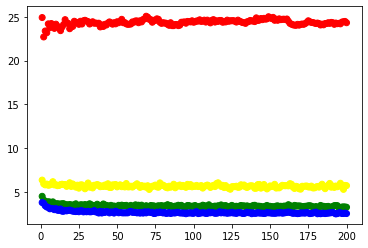

In [37]:
show_people(['person1', 'person5', 'person10', 'person15'], ['red', 'yellow', 'green', 'blue'])

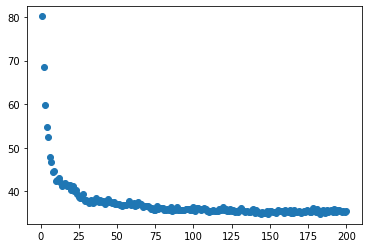

In [8]:
show(ls_df, 'initial-weight', 'range')